In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
# 读取四张表的数据
#读取了订单和产品id的关联，csv比较大
prior = pd.read_csv("G:/wangdao_python_short_class/python_ml/data/instacart/order_products__prior.csv")

In [4]:
#产品id，与过道的对应
products = pd.read_csv("G:/wangdao_python_short_class/python_ml/data/instacart/products.csv")

In [9]:
#订单id和用户id的对应，csv比较大
orders = pd.read_csv("G:/wangdao_python_short_class/python_ml/data/instacart/orders.csv")

In [5]:
#超市的过道，过道放的产品的品类
aisles = pd.read_csv("G:/wangdao_python_short_class/python_ml/data/instacart/aisles.csv")

In [6]:
prior.head()  #订单id，产品id，下面只需要掌握订单和产品的关联即可

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [7]:
products.head() #产品id，产品名称，过道id

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [10]:
orders.head() #订单id，用户id

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [12]:
aisles.head() #过道id，对应过道里放了哪些产品类别

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [13]:
# 合并四张表到一张表  （用户-物品类别），在这里挂了，用下阿里云
#订单表和产品表关联
#用户买了哪些订单，订单里面有哪些产品，产品对应的过道，过道对应的产品类别
_mg = pd.merge(prior, products, on=['product_id', 'product_id'])
_mg = pd.merge(_mg, orders, on=['order_id', 'order_id'])
mt = pd.merge(_mg, aisles, on=['aisle_id', 'aisle_id'])

In [14]:
mt.head(10)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,202279,prior,3,5,9,8.0,fresh vegetables
2,2,9327,3,0,Garlic Powder,104,13,202279,prior,3,5,9,8.0,spices seasonings
3,2,45918,4,1,Coconut Butter,19,13,202279,prior,3,5,9,8.0,oils vinegars
4,2,30035,5,0,Natural Sweetener,17,13,202279,prior,3,5,9,8.0,baking ingredients
5,2,17794,6,1,Carrots,83,4,202279,prior,3,5,9,8.0,fresh vegetables
6,2,40141,7,1,Original Unflavored Gelatine Mix,105,13,202279,prior,3,5,9,8.0,doughs gelatins bake mixes
7,2,1819,8,1,All Natural No Stir Creamy Almond Butter,88,13,202279,prior,3,5,9,8.0,spreads
8,2,43668,9,0,Classic Blend Cole Slaw,123,4,202279,prior,3,5,9,8.0,packaged vegetables fruits
9,3,33754,1,1,Total 2% with Strawberry Lowfat Greek Strained...,120,16,205970,prior,16,5,17,12.0,yogurt


In [18]:
mt.shape

(32434489, 14)

In [16]:
mt.isnull().sum()/mt.shape[0]  #数据缺失率，没有缺失值

order_id                  0.00000
product_id                0.00000
add_to_cart_order         0.00000
reordered                 0.00000
product_name              0.00000
aisle_id                  0.00000
department_id             0.00000
user_id                   0.00000
eval_set                  0.00000
order_number              0.00000
order_dow                 0.00000
order_hour_of_day         0.00000
days_since_prior_order    0.06407
aisle                     0.00000
dtype: float64

In [19]:
# 交叉表（特殊的分组工具），如果在这一步内存不够了，重启一下jupyter，还是不行，筛选一部分用户的数据，进行聚类
cross = pd.crosstab(mt['user_id'], mt['aisle'])
cross.head(10)

aisle,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,3,0,0,0,0,2,0,0,0,...,3,1,1,0,0,0,0,2,0,42
3,0,0,0,0,0,0,0,0,0,0,...,4,1,0,0,0,0,0,2,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,5
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,6,0,2,0,0,0,...,0,0,0,0,0,0,0,2,0,19


In [20]:
#针对20万用户，有134个特征(过道)
cross.shape

(206209, 134)

In [22]:
# 进行主成分分析，保留90%的成分，实际特征数目减少了几倍，134--》27
pca = PCA(n_components=0.9)
data = pca.fit_transform(cross) 
data.shape

(206209, 27)

In [23]:
# 把样本数量减少,为了下面画图方便，这里只取500个样本
x = data[:500]
x.shape

(500, 27)

In [24]:
# 假设用户一共分为四个类别
#n_clusters是分为几个类别，是主要的超参
km = KMeans(n_clusters=4)
km.fit(x)  #开始训练
#开始预测
predict = km.predict(x)

In [25]:
print(predict)  #预测得到的是每一个样本的类别

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1
 1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 2 1 1 1 1 0 3 1 1 1 2 1 1 1 1 1 1 1 1
 2 1 1 1 2 1 1 1 1 2 2 2 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 3 1 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1
 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 3
 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 2 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 1 1 2 1 1 1 1 1 1 

In [26]:
import numpy as np
np.unique(predict)

array([0, 1, 2, 3], dtype=int32)

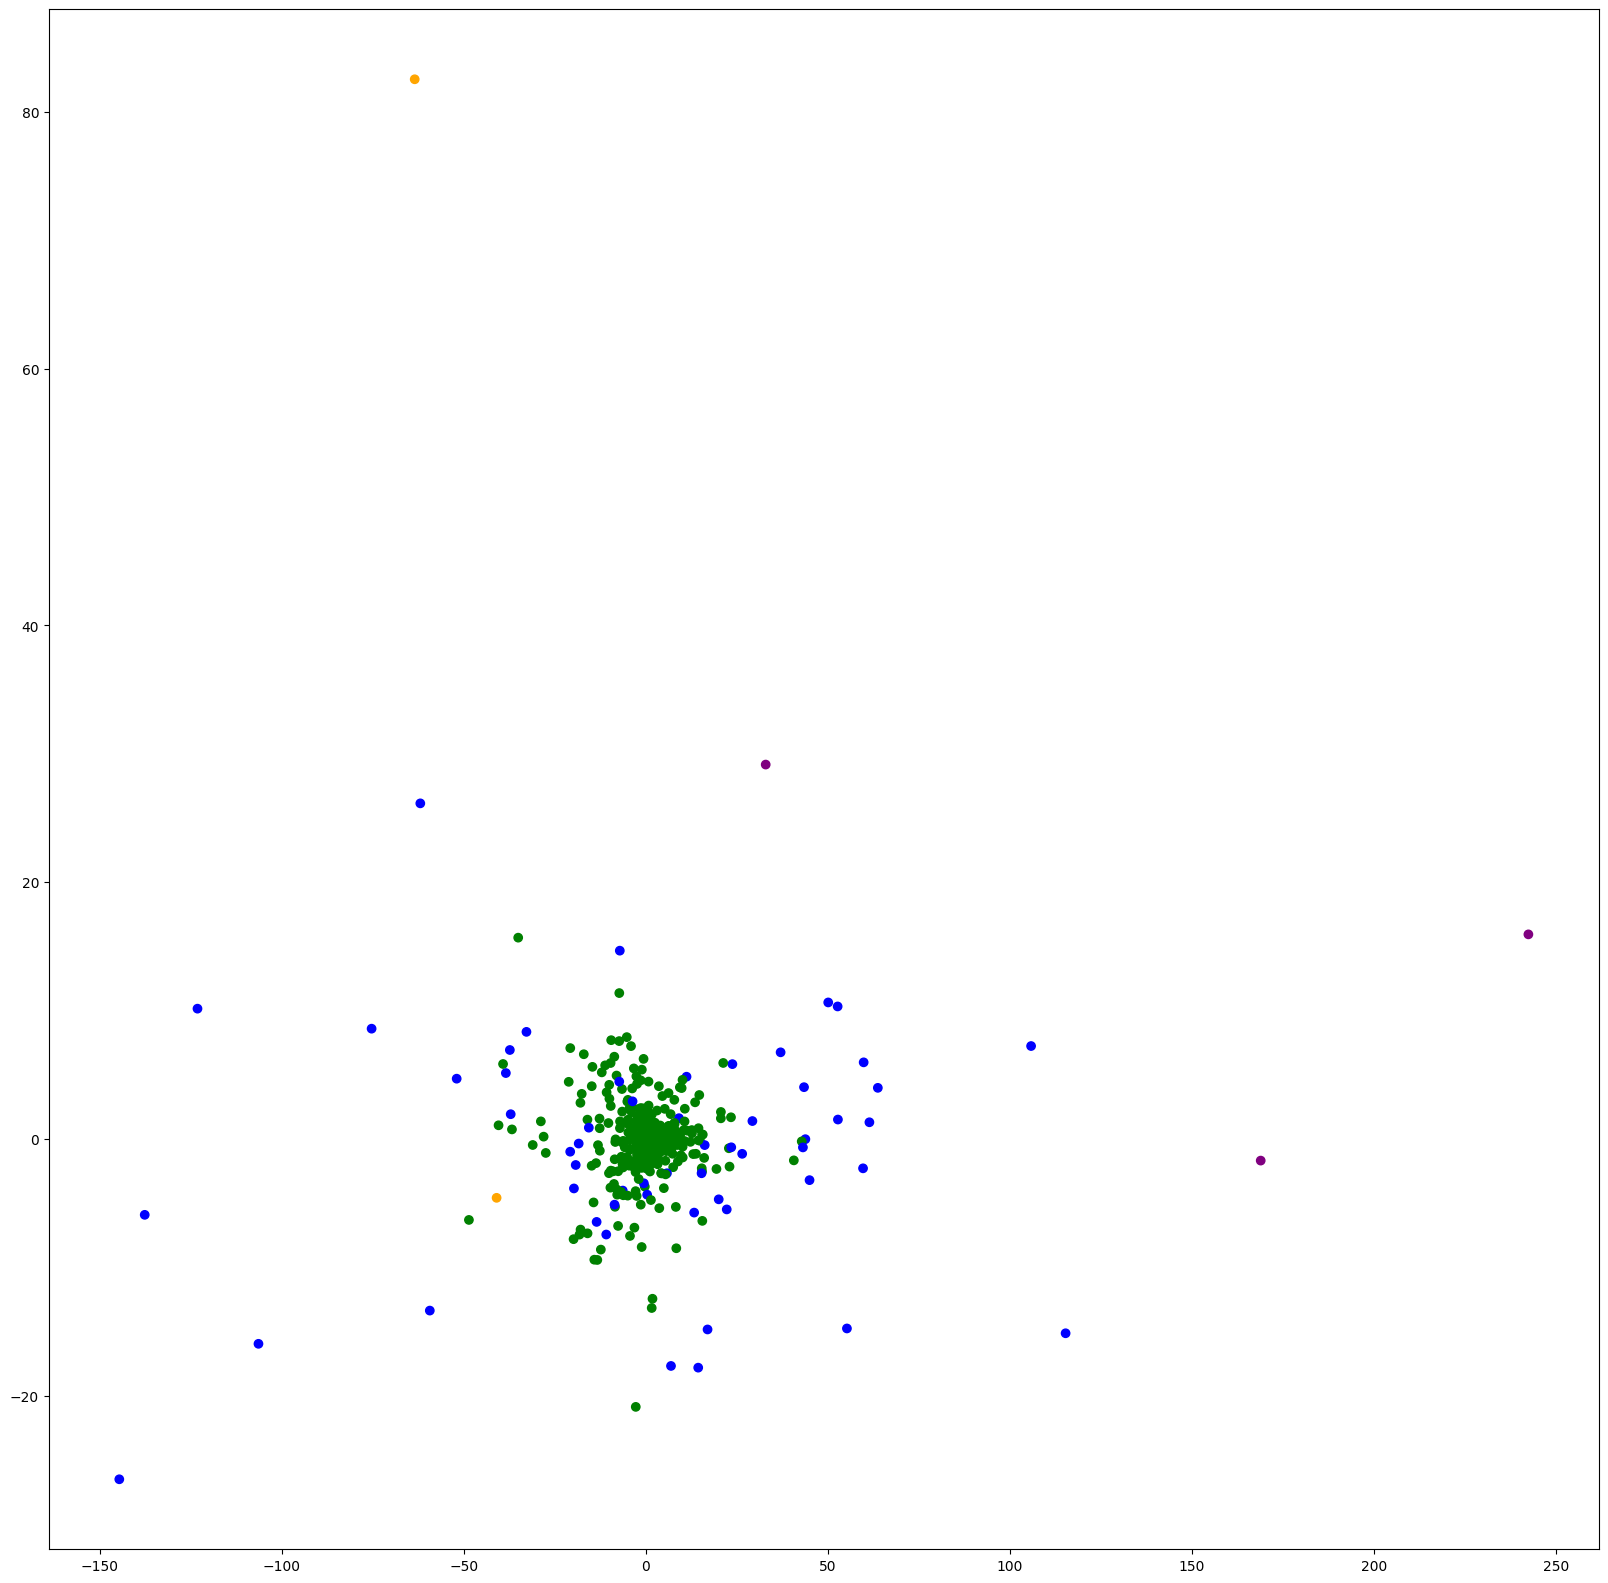

In [28]:
# 显示聚类的结果
plt.figure(figsize=(20, 20))
# 建立四个颜色的列表
colored = ['orange', 'green', 'blue', 'purple']
colr = [colored[i] for i in predict] #根据类别给每个样本赋予颜色
#去选择任意两个特征来看聚类的图，可以自行调整,第2个，第20个特征
plt.scatter(x[:, 1], x[:, 19], color=colr)


In [29]:
# 评判聚类效果，轮廓系数，聚类效果很难超过0.7，可以通过这个得分去调整上面KMeans的n_clusters
silhouette_score(x, predict)

np.float64(0.6587288059420777)

## 四种异常值检测的方法

### 1.基于分位数找异常值

In [30]:
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 1)  # 2维数据
X[0,0]=3
X[1,0]=2

import pandas as pd

# 假设df是一个Pandas DataFrame，包含了你想要分析的数据集
# 'column_name'是你想要检测异常值的列名

#随机一个dataframe
df=pd.DataFrame(X,columns=['column_name'])

# 设置分位数，例如四分位数
Q1 = df['column_name'].quantile(0.25)  # 第一四分位数（25%）
Q3 = df['column_name'].quantile(0.75)  # 第三四分位数（75%）

# 计算四分位数范围（IQR）
IQR = Q3 - Q1

# 定义下界和上界来识别异常值
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 标记异常值
df['outlier'] = df['column_name'].apply(lambda x: 'Yes' if x < lower_bound or x > upper_bound else 'No')

# 打印出被标记为异常值的行
df[df['outlier'] == 'Yes']

,column_name,outlier
0,3.0,Yes
1,2.0,Yes


### 2.基于Z-score法找异常值

### 3.基于DBSCAN算法找异常值

(1600, 2)


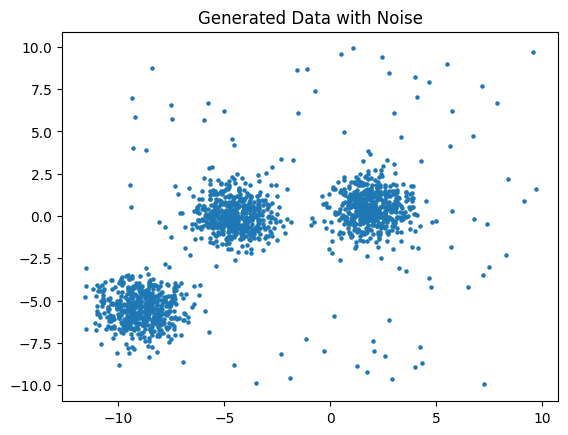

In [31]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# 生成样本数据
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state) #y没有用

# 增加一些噪声点，往X中拼接噪声点
rng = np.random.RandomState(74)
X = np.concatenate([X, rng.uniform(low=-10, high=10, size=(100, 2))])
print(X.shape) #1600个样本，2列特征，100个噪声点
# 可视化生成的数据
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.title("Generated Data with Noise")
plt.show()

[-1  0  1  2]
131
[0 1 2]


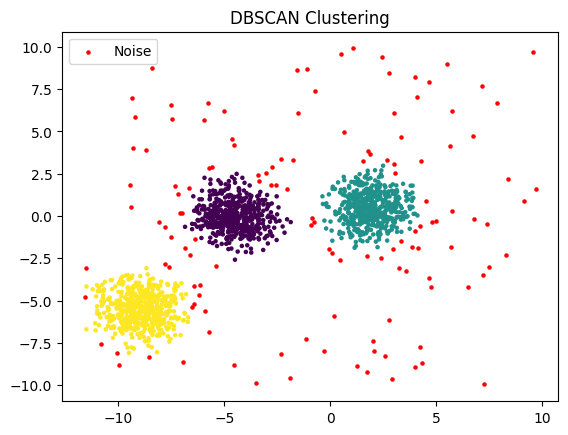

In [32]:
# 使用DBSCAN算法
db = DBSCAN(eps=0.5, min_samples=5).fit(X) # eps是半径，min_samples是最少包含几个点才会被认为是核心点
labels = db.labels_ # 得到每个点的类别
print(np.unique(labels)) # 得到类别有-1 0 1 2 总计4个类别
# 标签为-1的点是噪声点
noise_mask = (labels == -1)
print(np.sum(noise_mask)) # 噪声点的数量
print(np.unique(labels[~noise_mask])) # 得到噪声点的mask
# 可视化聚类结果
plt.scatter(X[~noise_mask, 0], X[~noise_mask, 1], c=labels[~noise_mask], s=5, cmap='viridis') # 正常点用彩色标注
plt.scatter(X[noise_mask, 0], X[noise_mask, 1], c='red', s=5, label='Noise') # 噪声点用红色标注
plt.title("DBSCAN Clustering")
plt.legend()
plt.show()


### 4.基于Isolation Forest（孤立森林）算法找异常值

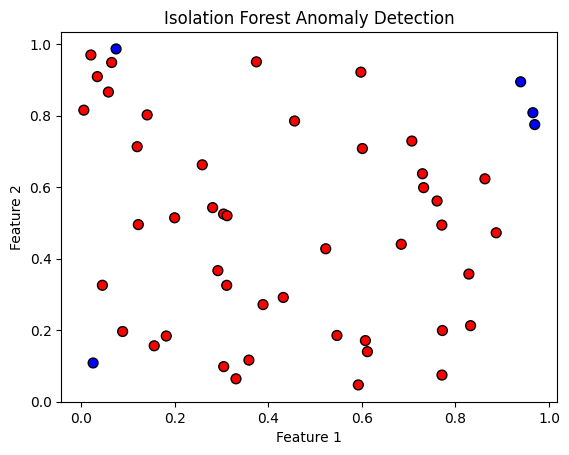

In [33]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 随机生成50个数据点
np.random.seed(42)  # 为了结果的可重复性设置随机种子
X = np.random.rand(50, 2)  # 2维数据,2列好画图来解释

# 初始化Isolation Forest模型，contamination参数表示异常值比例，默认0.1
iso_forest = IsolationForest(random_state=42, contamination=0.1)

# 训练模型，随机建树的过程
iso_forest.fit(X)

# 预测每个点的异常分数，在树中的高度越低，越可能是异常点
scores = iso_forest.decision_function(X)

# print(scores)
# 将异常分数转换为1（正常）和-1（异常）的标签
labels = iso_forest.predict(X)
# print(labels)
# 绘制数据点和异常点
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap=plt.cm.bwr, edgecolor='k', s=50)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [34]:
#把scores和labels拼接到一起
df=pd.DataFrame(np.c_[X,scores,labels],columns=['Feature 1','Feature 2','scores','labels'])
df

,Feature 1,Feature 2,scores,labels
0,0.374540,0.950714,0.001053,1.0
1,0.731994,0.598658,0.100556,1.0
2,0.156019,0.155995,0.053615,1.0
3,0.058084,0.866176,0.050242,1.0
4,0.601115,0.708073,0.071848,1.0
5,0.020584,0.969910,0.004049,1.0
6,0.832443,0.212339,0.019976,1.0
7,0.181825,0.183405,0.062738,1.0
8,0.304242,0.524756,0.108842,1.0
9,0.431945,0.291229,0.078362,1.0


In [35]:
labels[labels==-1]

array([-1, -1, -1, -1, -1])